In [1]:
! python --version

Python 3.10.2


In [2]:
import torch
device = torch.device(["cpu", "cuda"][torch.cuda.is_available()])
device

device(type='cuda')

# Images & Logistic Regression

In [3]:
# library
import torchvision
from torchvision.datasets import MNIST

In [4]:
dataset = MNIST(root = 'data/', download=True)

In [5]:
len(dataset)

60000

In [6]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [7]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


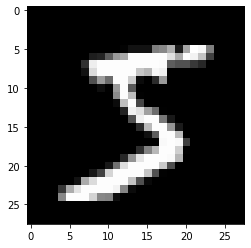

In [9]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print(f'Label: {label}')

Label: 3


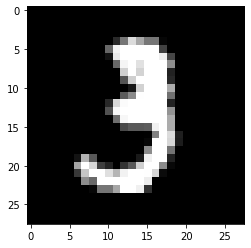

In [10]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print(f'Label: {label}')

In [11]:
import torchvision.transforms as transforms

In [12]:
dataset = MNIST(root='data/',
                train=True,
                transform=transforms.ToTensor())

In [13]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [14]:
print(img_tensor[:, 10:15, 10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


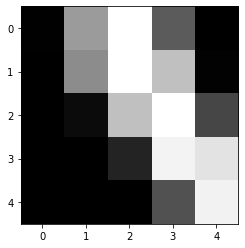

In [15]:
plt.imshow(img_tensor[0, 10:15, 10:15], cmap='gray')

In [16]:
import numpy as np

def split_indices(n, val_pct):
    # determine size of validation set
    n_val = int(val_pct * n)
    # random permuation of 0 to n - 1
    idxs = np.random.permutation(n)
    # pick first n_val indice for validation set
    return idxs[n_val: ], idxs[:n_val]

In [17]:
train_indices, val_indices = split_indices(len(dataset), val_pct=0.2)

In [18]:
print(len(train_indices), len(val_indices))
print(f'Sample val indices: {val_indices[:20]}')

48000 12000
Sample val indices: [47509 20495 42483  6741 17009  7559 47615 16349 31232 39082 19223 54373
  6959 39158  1399 55780 56060 46238 12721 31501]


In [19]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [20]:
batch_size = 100

# Traning sampler and data loader
# SubsetRandomSampler only use indice in train indices
train_sampler = SubsetRandomSampler(train_indices) 
train_loader = DataLoader(dataset,
                          batch_size,
                          sampler=train_sampler)

# Validation sampler and data loader
val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset, 
                        batch_size,
                        sampler=val_sampler)

In [21]:
import torch.nn as nn

input_size = 28 * 28
num_classes = 10

# Logistic Regression Model
model = nn.Linear(input_size, num_classes)

In [22]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0187, -0.0068,  0.0106,  ...,  0.0050,  0.0005, -0.0039],
        [ 0.0101, -0.0126,  0.0216,  ..., -0.0159,  0.0109, -0.0116],
        [ 0.0069,  0.0209, -0.0167,  ..., -0.0103, -0.0307, -0.0338],
        ...,
        [-0.0140,  0.0123,  0.0230,  ...,  0.0067, -0.0328,  0.0292],
        [-0.0075,  0.0340, -0.0047,  ..., -0.0080, -0.0217,  0.0273],
        [-0.0288, -0.0030,  0.0204,  ..., -0.0118,  0.0096,  0.0096]],
       requires_grad=True)

In [23]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0272, -0.0283, -0.0269,  0.0239,  0.0142,  0.0315,  0.0117,  0.0261,
        -0.0151,  0.0010], requires_grad=True)

In [24]:
# for images, labels in train_loader:
#     print(labels)
#     print(images.shape)
#     outputs = model(images)
#     break

In [25]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
    
    def forward(self, xb):
        xb = xb.reshape(-1, 28 * 28)
        out = self.linear(xb)
        return out

model = MnistModel()

In [26]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0192,  0.0251,  0.0052,  ..., -0.0156,  0.0232,  0.0020],
         [-0.0248, -0.0116, -0.0020,  ...,  0.0125, -0.0191, -0.0143],
         [-0.0085,  0.0318,  0.0107,  ..., -0.0227, -0.0321,  0.0123],
         ...,
         [-0.0220, -0.0042, -0.0213,  ...,  0.0201,  0.0291,  0.0113],
         [ 0.0190, -0.0068, -0.0262,  ...,  0.0141,  0.0166,  0.0164],
         [ 0.0323, -0.0340, -0.0144,  ...,  0.0029,  0.0217, -0.0342]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0232,  0.0236, -0.0245,  0.0162,  0.0187, -0.0082,  0.0261,  0.0265,
         -0.0220, -0.0062], requires_grad=True)]

In [27]:
for images, labels in train_loader:
    outputs = model(images)
    break

print(f'output.shape : {outputs.shape}')
print(f'Sample output :\n {outputs[:2].data}')

output.shape : torch.Size([100, 10])
Sample output :
 tensor([[ 0.2681,  0.1975,  0.3730, -0.3272,  0.4500, -0.3703, -0.2138,  0.3878,
         -0.0190, -0.1710],
        [-0.1247, -0.0056,  0.1166, -0.1621, -0.0195, -0.1930, -0.2301, -0.0412,
         -0.3085, -0.1742]])


In [28]:
def softmax(v):
    denom = torch.sum(torch.exp(v))
    res = []
    for i in v:
        res.append(torch.exp(v[i]) / denom)
    return torch.tensor(res, dtype=torch.float64)


In [29]:
import torch.nn.functional as F

In [30]:
# apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# look at sample probabilities 
print(f"Sample Probabilities:\n{probs[:2].data}")

# add up the probabilities of an output row
print(f"Sum: {torch.sum(probs[0]).item()}")

Sample Probabilities:
tensor([[0.1182, 0.1101, 0.1313, 0.0652, 0.1418, 0.0624, 0.0730, 0.1332, 0.0887,
         0.0762],
        [0.0982, 0.1107, 0.1251, 0.0946, 0.1091, 0.0918, 0.0884, 0.1068, 0.0818,
         0.0935]])
Sum: 0.9999999403953552


In [31]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([4, 2, 2, 7, 4, 2, 4, 7, 1, 7, 7, 7, 2, 2, 4, 4, 1, 1, 2, 6, 7, 4, 2, 4,
        1, 1, 1, 7, 1, 1, 1, 1, 1, 2, 4, 2, 2, 7, 4, 2, 0, 1, 1, 7, 7, 2, 7, 1,
        1, 4, 4, 4, 4, 1, 4, 1, 2, 2, 2, 4, 4, 4, 0, 6, 7, 1, 7, 0, 1, 1, 1, 2,
        2, 7, 4, 7, 1, 2, 4, 1, 7, 2, 1, 4, 4, 0, 4, 2, 0, 7, 4, 2, 4, 2, 1, 7,
        1, 7, 7, 6])
tensor([0.1418, 0.1251, 0.1419, 0.1459, 0.1402, 0.1310, 0.1241, 0.1219, 0.1445,
        0.1323, 0.1301, 0.1429, 0.1476, 0.1233, 0.1078, 0.1395, 0.1335, 0.1324,
        0.1202, 0.1181, 0.1264, 0.1159, 0.1172, 0.1676, 0.1245, 0.1254, 0.1254,
        0.1526, 0.1343, 0.1448, 0.1373, 0.1181, 0.1270, 0.1730, 0.1135, 0.1217,
        0.1188, 0.1625, 0.1433, 0.1354, 0.1276, 0.1362, 0.1199, 0.1371, 0.1212,
        0.1193, 0.1256, 0.1187, 0.1134, 0.1591, 0.1385, 0.1485, 0.1167, 0.1514,
        0.1261, 0.1148, 0.1212, 0.1226, 0.1885, 0.1338, 0.1222, 0.1445, 0.1239,
        0.1245, 0.1151, 0.1264, 0.1592, 0.1138, 0.1318, 0.1304, 0.1301, 0.1582,
        0.1430, 0.1

In [32]:
labels

tensor([2, 2, 2, 0, 3, 6, 1, 3, 0, 6, 4, 8, 8, 5, 1, 0, 3, 5, 2, 9, 6, 1, 9, 7,
        6, 5, 3, 0, 3, 2, 7, 1, 3, 2, 6, 9, 2, 4, 7, 2, 7, 9, 6, 6, 4, 7, 5, 1,
        6, 7, 7, 9, 1, 5, 6, 3, 2, 2, 2, 8, 7, 2, 3, 5, 9, 8, 0, 5, 1, 5, 8, 8,
        5, 8, 1, 4, 5, 2, 0, 1, 4, 1, 3, 0, 9, 3, 5, 8, 6, 4, 4, 8, 0, 4, 1, 1,
        3, 6, 6, 5])

In [33]:
def accuracy(l1, l2):
    return torch.sum(l1 == l2).item() / len(l1)

In [34]:
accuracy(preds, labels)

0.16

In [35]:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1] # 9
[0, 0, 2, 0, 0, 0, 0, 0, 0, 0] # 2
# real_label * log(predicted_probabiltiy)

[0, 0, 2, 0, 0, 0, 0, 0, 0, 0]

In [36]:
loss_fn = F.cross_entropy # softmax internally -> cross entropy

In [73]:
loss = loss_fn(outputs, labels)
print((outputs[0], labels[0]))
print(loss)

(tensor([ 0.2681,  0.1975,  0.3730, -0.3272,  0.4500, -0.3703, -0.2138,  0.3878,
        -0.0190, -0.1710], grad_fn=<SelectBackward0>), tensor(2))
tensor(2.3241, grad_fn=<NllLossBackward0>)


In [38]:
learnin_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learnin_rate)

In [39]:
def loss_batch(model, loss_func, xb, yb, opt=None, metric=None):
    # calculate loss and make predictions
    preds = model(xb)
    # yb = torch.tensor(yb, dtype=torch.float64)
    # preds = torch.tensor(preds, dtype=torch.float64)
    loss = loss_func(preds, yb)

    if opt is not None:
        # compute gradients
        loss.backward()
        # update parameters
        opt.step()
        # reset gradients
        opt.zero_grad()
    
    metric_result = None
    if metric is not None:
        # Compute metics
        metric_result = metric(preds, yb)
    
    return loss.item(), len(xb), metric_result

In [40]:
def evaluate(model, loss_fn, valid_dl, metric=None):
    with torch.no_grad():
        # pass each batch through the model
        results = [loss_batch(model, loss_fn, xb, yb, metric=metric)
                    for xb, yb in valid_dl]
        # sepearte losses, counts and metics
        losses, nums, metrics = zip(*results)
        # total size of the datasets
        total = np.sum(nums)
        avg_loss = np.sum(np.multiply(losses, nums)) / total
        avg_metric = None
        if metric is not None:
            # avg of metric across batches 
            avg_metric = np.sum(np.multiply(metrics, nums)) / total
        return avg_loss, total, avg_metric

In [41]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.sum(preds == labels).item() / len(preds)


In [42]:
val_loss, total_val, val_acc = evaluate(model, loss_fn, val_loader, metric=accuracy)
print(f"Loss: {val_loss:.4f}, Accuracy: {val_acc:.4f}")

Loss: 2.3203, Accuracy: 0.1400


In [46]:
def fit(epochs, model, loss_fn, opt, train_dl, valid_dl, metric=None):
    for epoch in range(epochs):
        # traning
        for xb, yb in train_dl:
            loss, _, _ = loss_batch(model, loss_fn, xb, yb, opt)

        # evalution
        result = evaluate(model, loss_fn, valid_dl, metric)
        val_loss, total, val_metirc = result

        # print progress
        if metric is not None:
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {val_loss:.4f}')
        else:
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {val_loss:.4f}, {metric.__name__}: {val_metirc::.4f}')

In [47]:
# redefining the model
model = MnistModel()
optimizer = torch.optim.SGD(model.parameters(), lr=learnin_rate)

In [48]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 1.8808
Epoch [2/5], Loss: 1.5768
Epoch [3/5], Loss: 1.3642
Epoch [4/5], Loss: 1.2118
Epoch [5/5], Loss: 1.0991


In [49]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 1.0127
Epoch [2/5], Loss: 0.9447
Epoch [3/5], Loss: 0.8898
Epoch [4/5], Loss: 0.8444
Epoch [5/5], Loss: 0.8065


In [50]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 0.7740
Epoch [2/5], Loss: 0.7461
Epoch [3/5], Loss: 0.7217
Epoch [4/5], Loss: 0.7002
Epoch [5/5], Loss: 0.6811


In [51]:
fit(5, model, F.cross_entropy, optimizer, train_loader, val_loader, accuracy)

Epoch [1/5], Loss: 0.6640
Epoch [2/5], Loss: 0.6485
Epoch [3/5], Loss: 0.6345
Epoch [4/5], Loss: 0.6218
Epoch [5/5], Loss: 0.6101


In [52]:
test_dataset = MNIST(root='data/',
                     train=False,
                     transform=transforms.ToTensor())


Shape: torch.Size([1, 28, 28])
Label: 7


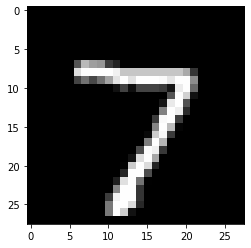

In [53]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print(f'Shape: {img.shape}')
print(f'Label: {label}')

In [54]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [55]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7, Predicted: 7


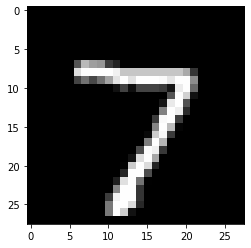

In [56]:
x = 0
img, label = test_dataset[x]
plt.imshow(img[0], cmap='gray')
print(f'Label: {label}, Predicted: {predict_image(img, model)}')

Label: 0, Predicted: 0


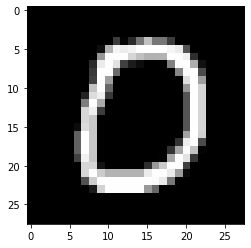

In [58]:
x = 10
img, label = test_dataset[x]
plt.imshow(img[0], cmap='gray')
print(f'Label: {label}, Predicted: {predict_image(img, model)}')

Label: 9, Predicted: 9


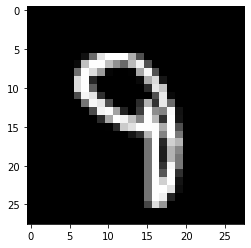

In [59]:
x = 193
img, label = test_dataset[x]
plt.imshow(img[0], cmap='gray')
print(f'Label: {label}, Predicted: {predict_image(img, model)}')

Label: 2, Predicted: 8


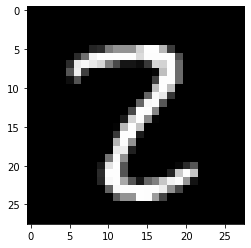

In [60]:
x = 1839
img, label = test_dataset[x]
plt.imshow(img[0], cmap='gray')
print(f'Label: {label}, Predicted: {predict_image(img, model)}')

In [61]:
test_loader = DataLoader(test_dataset, batch_size=200)
test_loss, total, test_acc = evaluate(model, loss_fn, test_loader, metric=accuracy)
print(f'Loss: {test_loss:.4f}, Accuracy: {test_acc:.4f}')

Loss: 0.5948, Accuracy: 0.8717


In [63]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [64]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0035,  0.0139,  0.0037,  ...,  0.0181, -0.0083,  0.0077],
                      [ 0.0085, -0.0312, -0.0079,  ..., -0.0330, -0.0116, -0.0283],
                      [-0.0321,  0.0300,  0.0169,  ..., -0.0241,  0.0250,  0.0119],
                      ...,
                      [ 0.0163,  0.0057,  0.0007,  ...,  0.0109, -0.0071, -0.0075],
                      [-0.0133,  0.0201,  0.0180,  ..., -0.0080,  0.0125, -0.0266],
                      [-0.0292,  0.0334,  0.0036,  ...,  0.0115,  0.0328,  0.0038]])),
             ('linear.bias',
              tensor([-0.0418,  0.1061, -0.0541, -0.0338,  0.0365,  0.0726, -0.0071,  0.0647,
                      -0.1259,  0.0019]))])

In [65]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0035,  0.0139,  0.0037,  ...,  0.0181, -0.0083,  0.0077],
                      [ 0.0085, -0.0312, -0.0079,  ..., -0.0330, -0.0116, -0.0283],
                      [-0.0321,  0.0300,  0.0169,  ..., -0.0241,  0.0250,  0.0119],
                      ...,
                      [ 0.0163,  0.0057,  0.0007,  ...,  0.0109, -0.0071, -0.0075],
                      [-0.0133,  0.0201,  0.0180,  ..., -0.0080,  0.0125, -0.0266],
                      [-0.0292,  0.0334,  0.0036,  ...,  0.0115,  0.0328,  0.0038]])),
             ('linear.bias',
              tensor([-0.0418,  0.1061, -0.0541, -0.0338,  0.0365,  0.0726, -0.0071,  0.0647,
                      -0.1259,  0.0019]))])

In [66]:
test_loader = DataLoader(test_dataset, batch_size=200)
test_loss, total, test_acc = evaluate(model2, loss_fn, test_loader, metric=accuracy)
print(f'Loss: {test_loss:.4f}, Accuracy: {test_acc:.4f}')

Loss: 0.5948, Accuracy: 0.8717


In [71]:
list(train_loader)[0][0].shape

torch.Size([100, 1, 28, 28])